<a href="https://colab.research.google.com/github/Csarabia2002/Tarea2_agrupamiento-clustering-_y_reduccion_dimensionalidad/blob/main/agrupamiento(clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AGRUPAMIENTO(CLUSTERING)SEEDS**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage # Para el gráfico de agrupación jerárquica
import seaborn as sns

# Nombres de columnas según el dataset
columnas = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'class']

# Cargar el archivo desde el mismo directorio del notebook
df_seeds = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columnas)

# Mostrar las primeras filas para verificar
df_seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


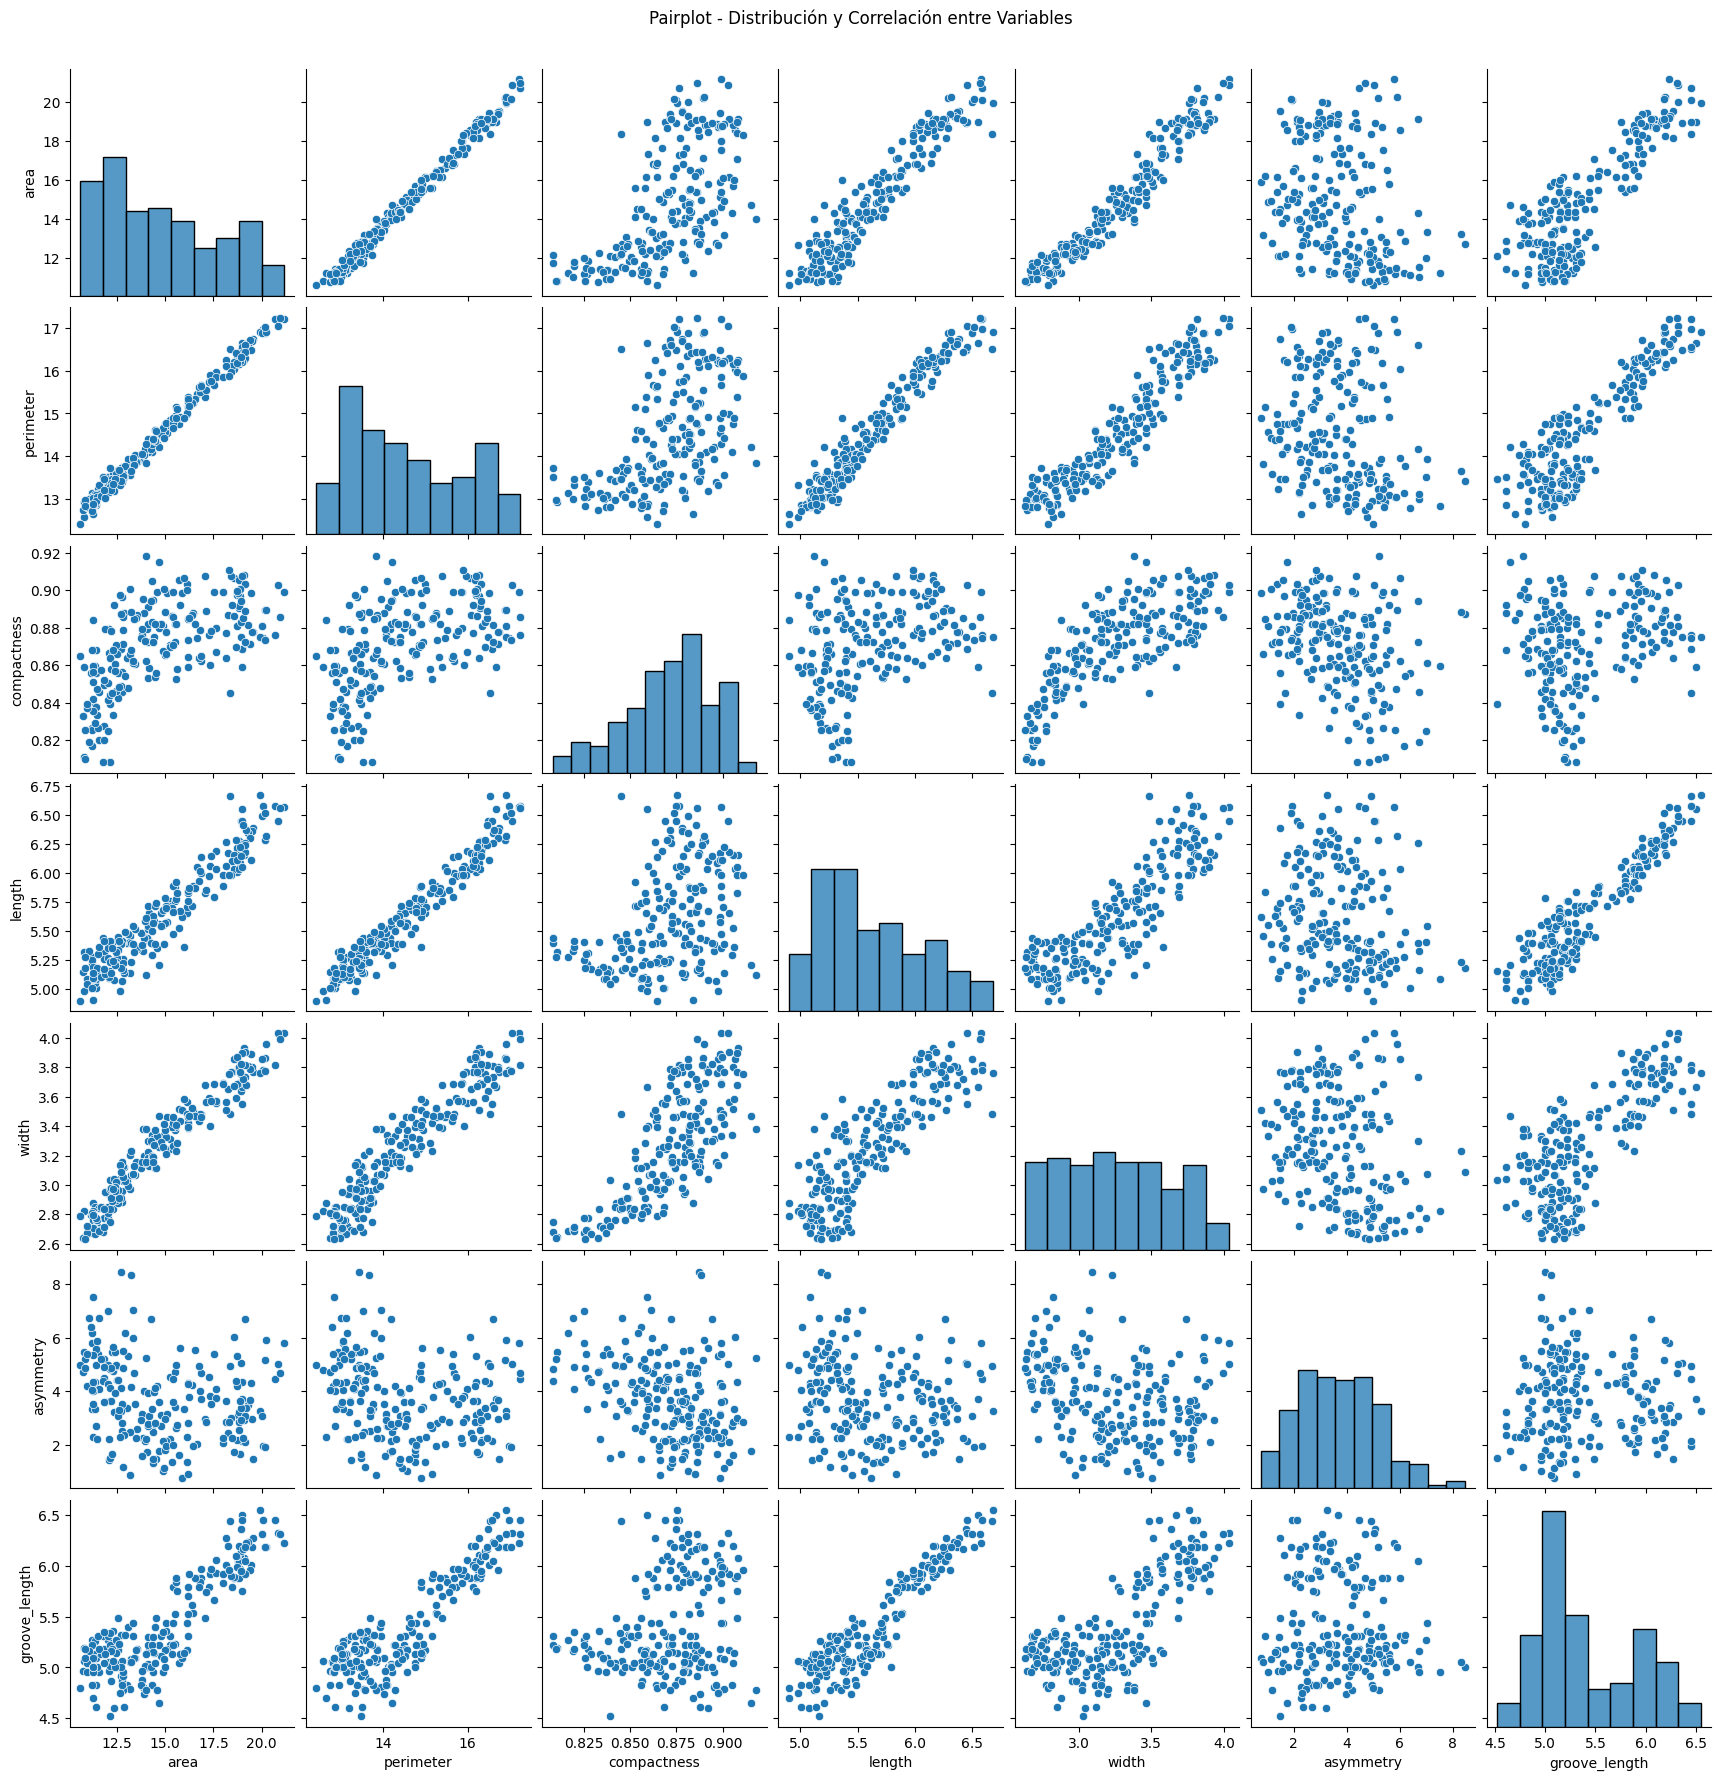

In [2]:
import matplotlib.pyplot as plt
# Seleccionar las columnas numéricas para el pairplot
numerical_cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']

# Crear el pairplot
sns.pairplot(df_seeds[numerical_cols])
plt.suptitle("Pairplot - Distribución y Correlación entre Variables", y=1.02)
plt.show()

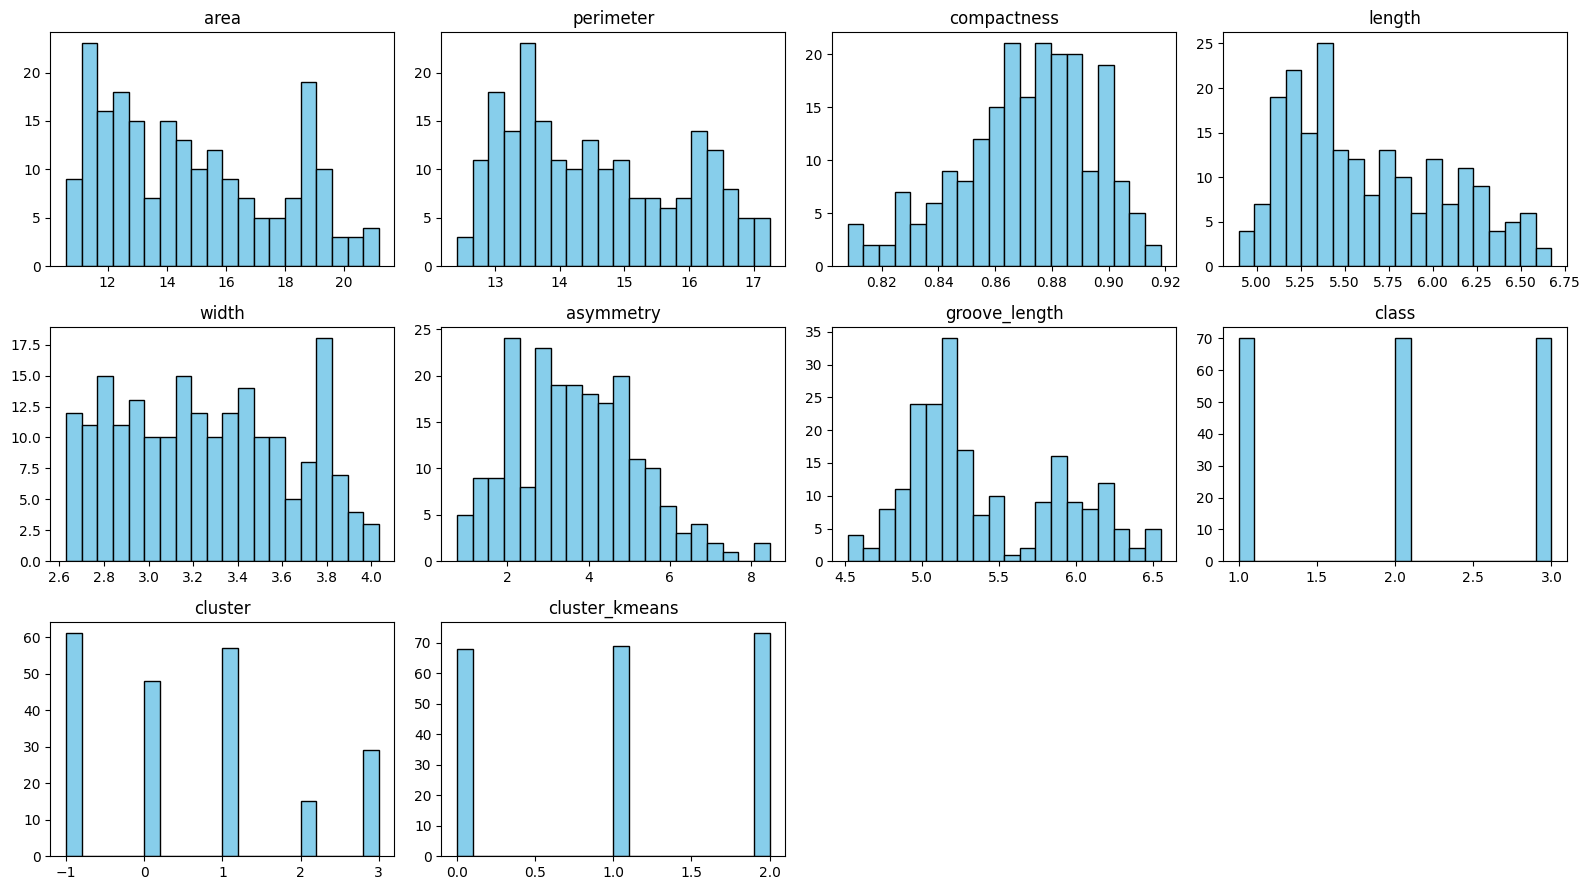

In [13]:
import matplotlib.pyplot as plt

# Número de columnas por fila
cols = 4
num_features = df_seeds.shape[1]
rows = -(-num_features // cols)  # Cálculo para redondear hacia arriba (ceil)

# Tamaño general del gráfico
plt.figure(figsize=(cols * 4, rows * 3))

# Iteramos sobre todas las columnas del DataFrame
for i, column in enumerate(df_seeds.columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df_seeds[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()


# **Metodo del codo (SEEDS)**

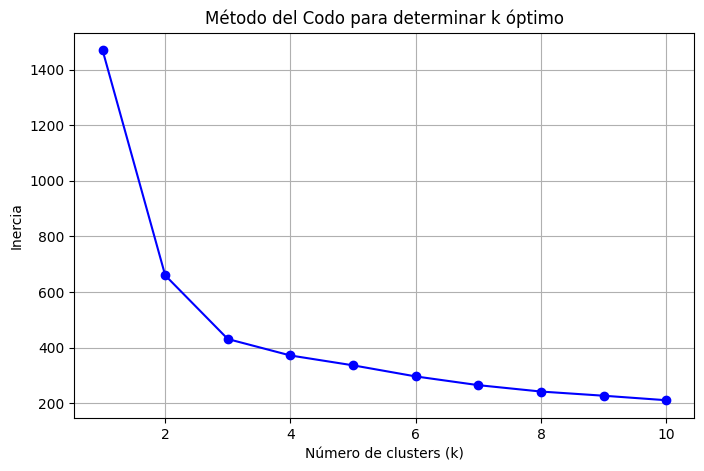

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar datos
columnas = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'class']
df_seeds = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columnas)

# Eliminar la columna de clase para clustering no supervisado
X = df_seeds.drop('class', axis=1)

# Escalar los datos (importante para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del Codo
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k óptimo')
plt.grid(True)
plt.show()


# **PCA(SEEDS)**

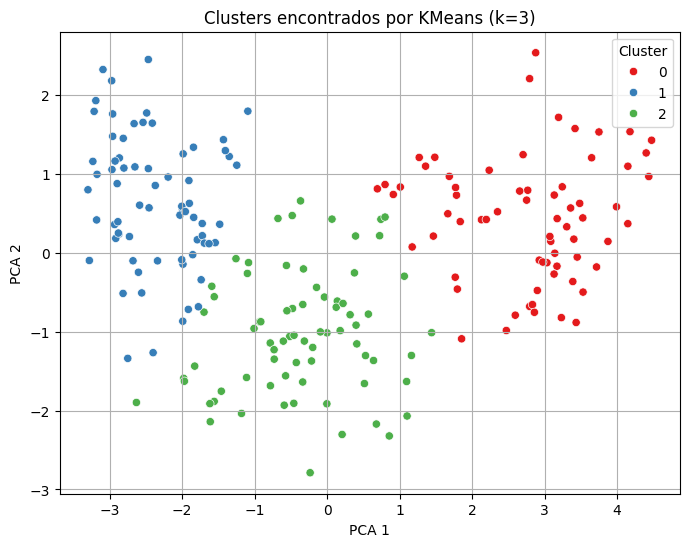

In [4]:
from sklearn.decomposition import PCA

# Escalar los datos si no se ha hecho antes
from sklearn.preprocessing import StandardScaler
X = df_seeds.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Agregar etiquetas al dataframe
df_seeds['cluster'] = labels

# Reducción a 2D con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clusters resultantes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
plt.title('Clusters encontrados por KMeans (k=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [5]:
# Asignar etiquetas de cluster al DataFrame original
df_seeds['cluster_kmeans'] = kmeans.labels_

# Mostrar las primeras filas para verificar
df_seeds.head()


,area,perimeter,compactness,length,width,asymmetry,groove_length,class,cluster,cluster_kmeans
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,2,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,2,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,2,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,2,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,2,2


In [6]:
df_seeds.head(30)

,area,perimeter,compactness,length,width,asymmetry,groove_length,class,cluster,cluster_kmeans
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1,2,2
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1,2,2
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1,2,2
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1,2,2
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1,2,2
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1,2,2
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1,2,2
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1,2,2
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1,0,0
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1,2,2


# **Tabla cruzada (SEEDS)**

In [7]:
# Tabla cruzada entre clase real y cluster asignado
tabla_clusters = pd.crosstab(df_seeds['class'], df_seeds['cluster'],
                             rownames=['Clase real'], colnames=['Cluster asignado'])

print(tabla_clusters)


Cluster asignado   0   1   2
Clase real                  
1                  2   4  64
2                 66   0   4
3                  0  65   5


- Clase real 1: La mayoría de las instancias de la clase real 1 (64 de 70) fueron asignadas al Cluster 2. Hay algunas asignaciones incorrectas al Cluster 0 (2) y al Cluster 1 (4).
- Clase real 2: La mayoría de las instancias de la clase real 2 (66 de 70) fueron asignadas al Cluster 0. Solo 4 instancias terminaron en el Cluster 2.
- Clase real 3: La mayoría de las instancias de la clase real 3 (65 de 70) fueron asignadas al Cluster 1. Solo 5 instancias terminaron en el Cluster 2.


# **silhouette_scores k-means(seeds)**

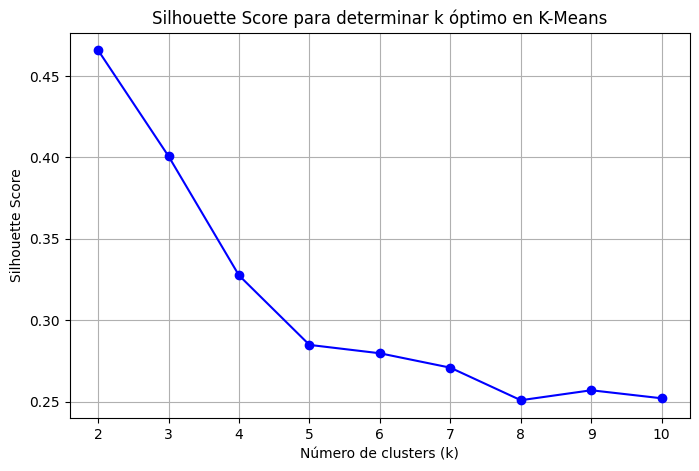

El número óptimo de clusters según el Silhouette Score es: 2


In [9]:
import matplotlib.pyplot as plt
# Calcular Silhouette Score para diferentes valores de k
silhouette_scores = []
K = range(2, 11) # Empezamos desde 2, ya que el silhouette score no está definido para k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Añadimos n_init
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Gráfico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar k óptimo en K-Means')
plt.grid(True)
plt.show()

# Encontrar el k con el mejor Silhouette Score
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters según el Silhouette Score es: {best_k}')

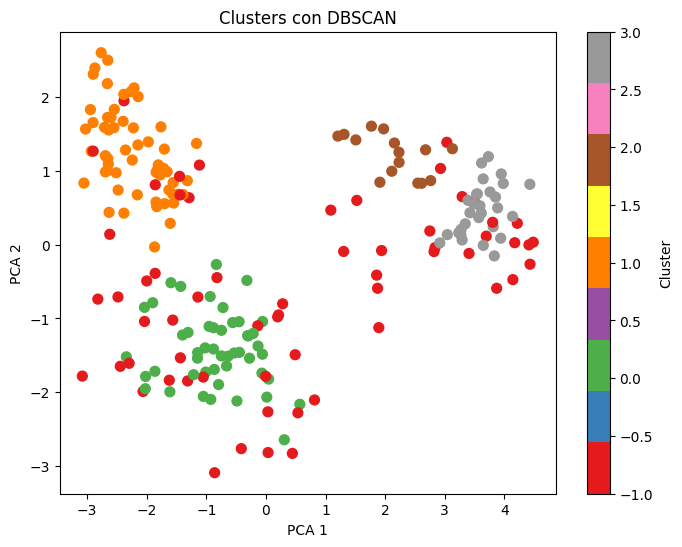

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suponiendo que tu DataFrame se llama df
# df = pd.read_csv("tu_archivo.csv")  # si lo tienes en archivo

# Paso 1: Escalamos los datos (DBSCAN es sensible a la escala)
X = df_seeds.drop('class', axis=1)  # Excluye la columna 'class' si estás haciendo clustering no supervisado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Puedes ajustar estos valores
dbscan.fit(X_scaled)


# Paso 3: Revisamos los clusters asignados
df_seeds['cluster'] = dbscan.labels_

# Paso 4 (opcional): Visualizamos los clusters en 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_seeds['cluster'], cmap='Set1', s=50)
plt.title('Clusters con DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


**segun ajustando los parametros de un eps=0.8 y min_samples= 5 el k-optimo es 4**
- El análisis del gráfico generado por DBSCAN revela la presencia de cinco agrupaciones, incluyendo un grupo de ruido (cluster -1) representado en rojo, con muchos puntos dispersos entre los demás grupos. Esto sugiere que los parámetros utilizados podrían ser demasiado restrictivos o que hay outliers reales en los datos.
-  El cluster 0, en verde, aparece bien definido en la parte inferior izquierda, indicando similitudes fuertes entre sus observaciones. El cluster 1, en naranja, también está compacto y cerca del cluster 0, lo que podría reflejar una relación entre ambos con diferencias leves en una o dos variables.
- En contraste, los clusters 2 y 3, ubicados en la parte superior derecha, se encuentran más aislados y parecen tener valores extremos o distintivos; el cluster 3, más pequeño y disperso, podría representar una subpoblación dentro del cluster 2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
columnas = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'class']
df_seeds = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columnas)

# Separar características (sin la clase)
X = df_seeds.drop('class', axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Calcular el linkage para el dendrograma
# Puedes cambiar el método a: 'single', 'complete', 'average', 'ward'
linked = linkage(X_scaled, method='ward')


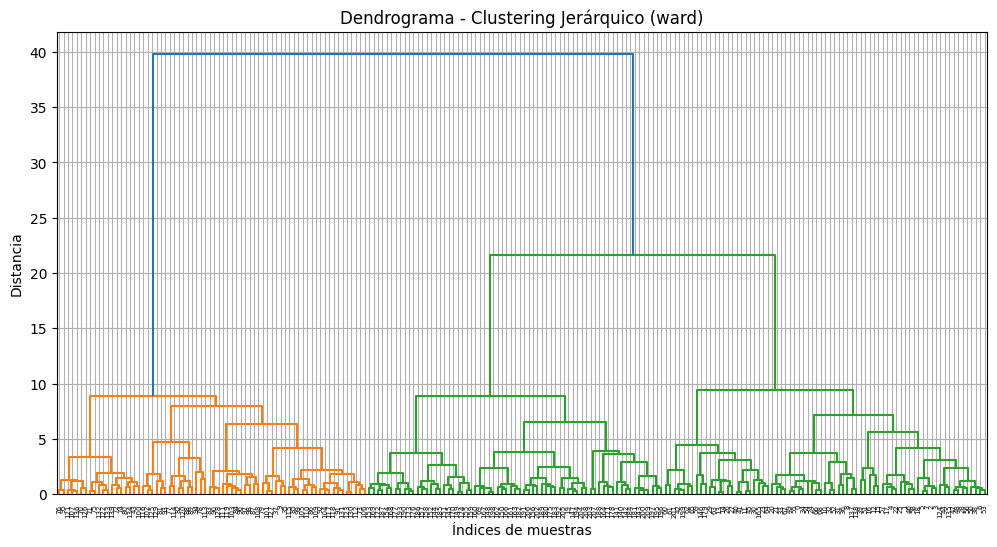

In [ ]:
# Crear el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico (ward)')
plt.xlabel('Índices de muestras')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()


- El dendrograma revela una estructura jerárquica clara, donde se identifican tres grandes ramas al cortar a una altura aproximada de 25 a 30 unidades, lo que concuerda con la expectativa de formar tres clusters en el dataset.
- Las uniones cercanas al eje horizontal indican semillas muy similares entre sí, posiblemente con características morfológicas casi idénticas o variaciones numéricas mínimas, mientras que las uniones a mayor altura representan diferencias estructurales más marcadas.
- Además, la asimetría del dendrograma —con una gran rama aislada a la izquierda y dos más subdivididas a la derecha— sugiere que uno de los grupos de semillas posee características distintivas, como un área mucho mayor o una compactness diferente, en contraste con los otros dos grupos, que parecen compartir atributos comunes y solo difieren de forma sutil.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma en 3 clusters (puedes cambiar el número)
clusters_hier = fcluster(linked, t=3, criterion='maxclust')

# Agregar al DataFrame
df_seeds['cluster_jerarquico'] = clusters_hier
df_seeds.head()


,area,perimeter,compactness,length,width,asymmetry,groove_length,class,cluster_jerarquico
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,3
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,3
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,3
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,3
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,3


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Cargar datos
columnas = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'class']
df_seeds = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columnas)

# Separar características (sin la clase)
X = df_seeds.drop('class', axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # puedes ajustar eps y min_samples
dbscan.fit(X_scaled)

# Obtener etiquetas de cluster
labels_dbscan = dbscan.labels_

# Agregar columna al DataFrame
df_seeds['cluster_dbscan'] = labels_dbscan
df_seeds.head()


,area,perimeter,compactness,length,width,asymmetry,groove_length,class,cluster_dbscan
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,-1


# **CALCULO SILHOUETTE_SCORE(SEEDS)**

In [ ]:
from sklearn.metrics import silhouette_score

# Asumiendo que ya tienes X_scaled y labels de KMeans (k=3)
# labels = kmeans.labels_

score = silhouette_score(X_scaled, labels)



In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Calcular linkage jerárquico
linked = linkage(X_scaled, method='ward')

# 3. Cortar en clusters (ej. 3 clusters)
clusters_hier = fcluster(linked, t=3, criterion='maxclust')

# 4. Guardar clusters en DataFrame
df_seeds['cluster_jerarquico'] = clusters_hier

# 5. Calcular Silhouette Score
score_hier = silhouette_score(X_scaled, clusters_hier)




In [ ]:
# Asumiendo que las etiquetas DBSCAN están en df_seeds['cluster_dbscan']
labels_dbscan = df_seeds['cluster_dbscan']

# Nota: DBSCAN puede asignar etiqueta -1 a ruido; silhouette_score no acepta -1,
# así que filtramos esos puntos para el cálculo

mask = labels_dbscan != -1
score_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])


In [ ]:
print(f'Silhouette Score para K-MEANS: {score:.4f}')
print(f'Silhouette Score para clustering jerárquico: {score_hier:.4f}')
print(f'Silhouette Score para DBSCAN (sin ruido): {score_dbscan:.4f}')


Silhouette Score para K-MEANS: 0.4024
Silhouette Score para clustering jerárquico: 0.3926
Silhouette Score para DBSCAN (sin ruido): 0.3755


- El K-Means presenta el valor más alto de Silhouette Score entre los tres algoritmos de clustering.
- Esto sugiere que los clústeres generados por K-Means están mejor definidos y más separados.


# **Agrupamiento(Clustering)Banknote_authenticaction**

In [63]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage # Para el gráfico de agrupación jerárquica
import seaborn as sns

# Nombres de columnas según la descripción
columnas = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

# Cargar el archivo (ajusta la ruta si es necesario)
df_billetes = pd.read_csv('data_banknote_authentication.txt', header=None, names=columnas)

# Separar características y etiquetas
X_billetes = df_billetes.drop('class', axis=1)
y_billetes = df_billetes['class']

# Escalar los datos
scaler = StandardScaler()
X_scaled_billetes = scaler.fit_transform(X_billetes)

df_billetes.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


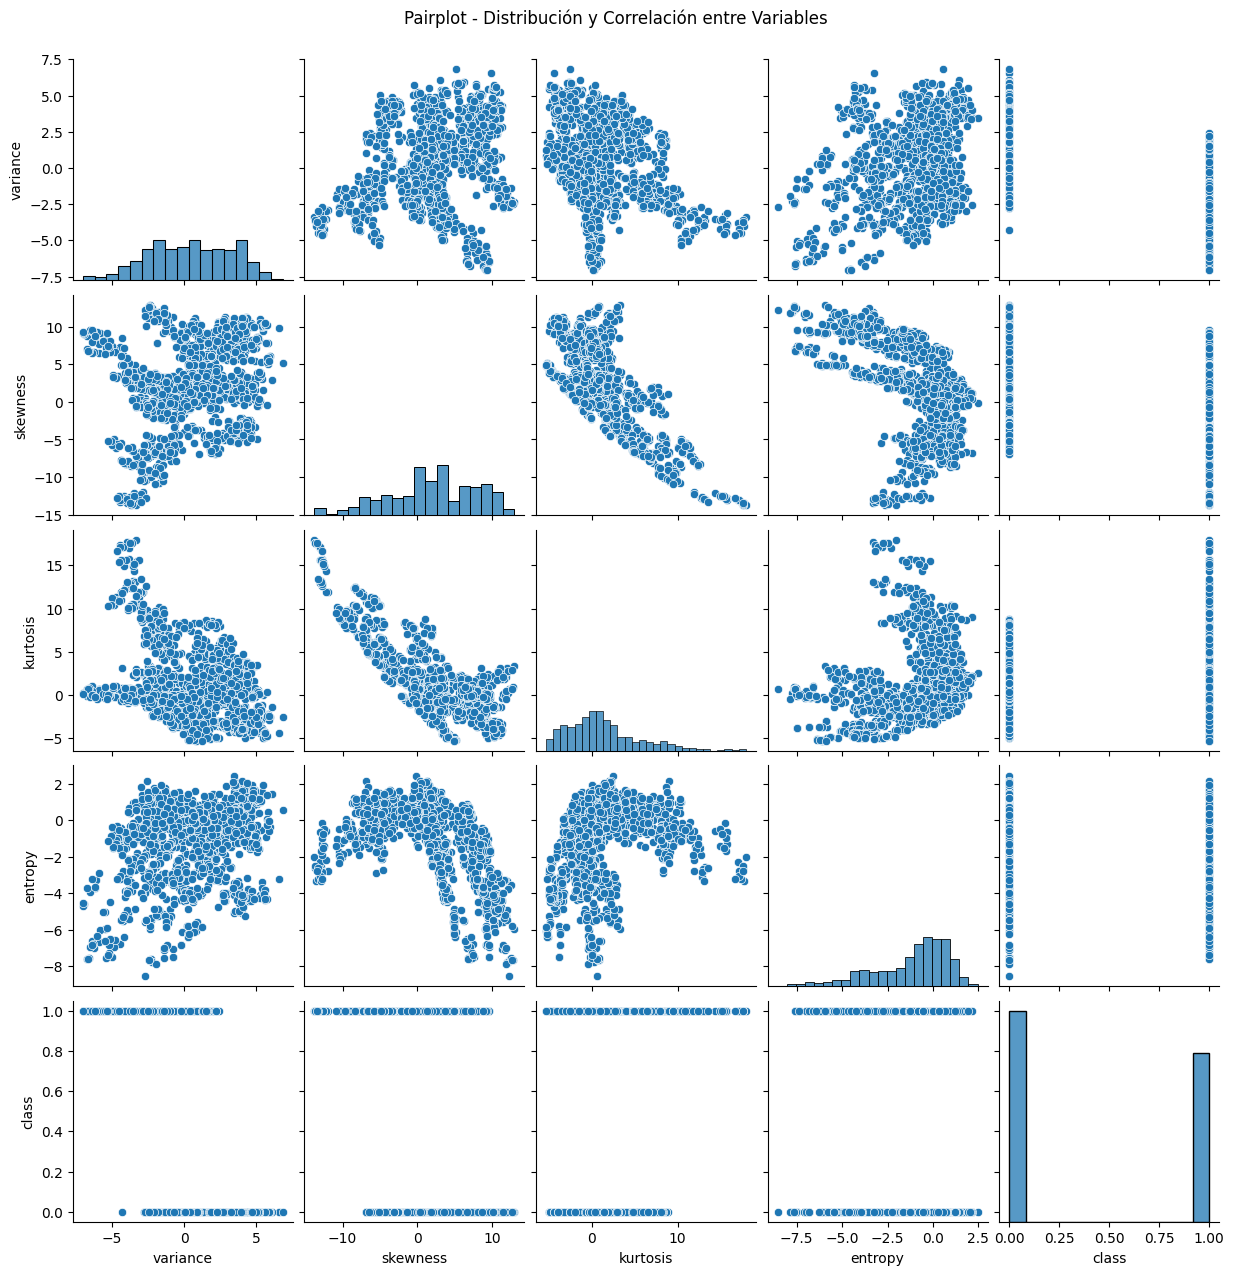

In [64]:
import matplotlib.pyplot as plt
# Seleccionar las columnas numéricas para el pairplot
numerical_cols = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']
# Crear el pairplot
sns.pairplot(df_billetes[numerical_cols])
plt.suptitle("Pairplot - Distribución y Correlación entre Variables", y=1.02)
plt.show()

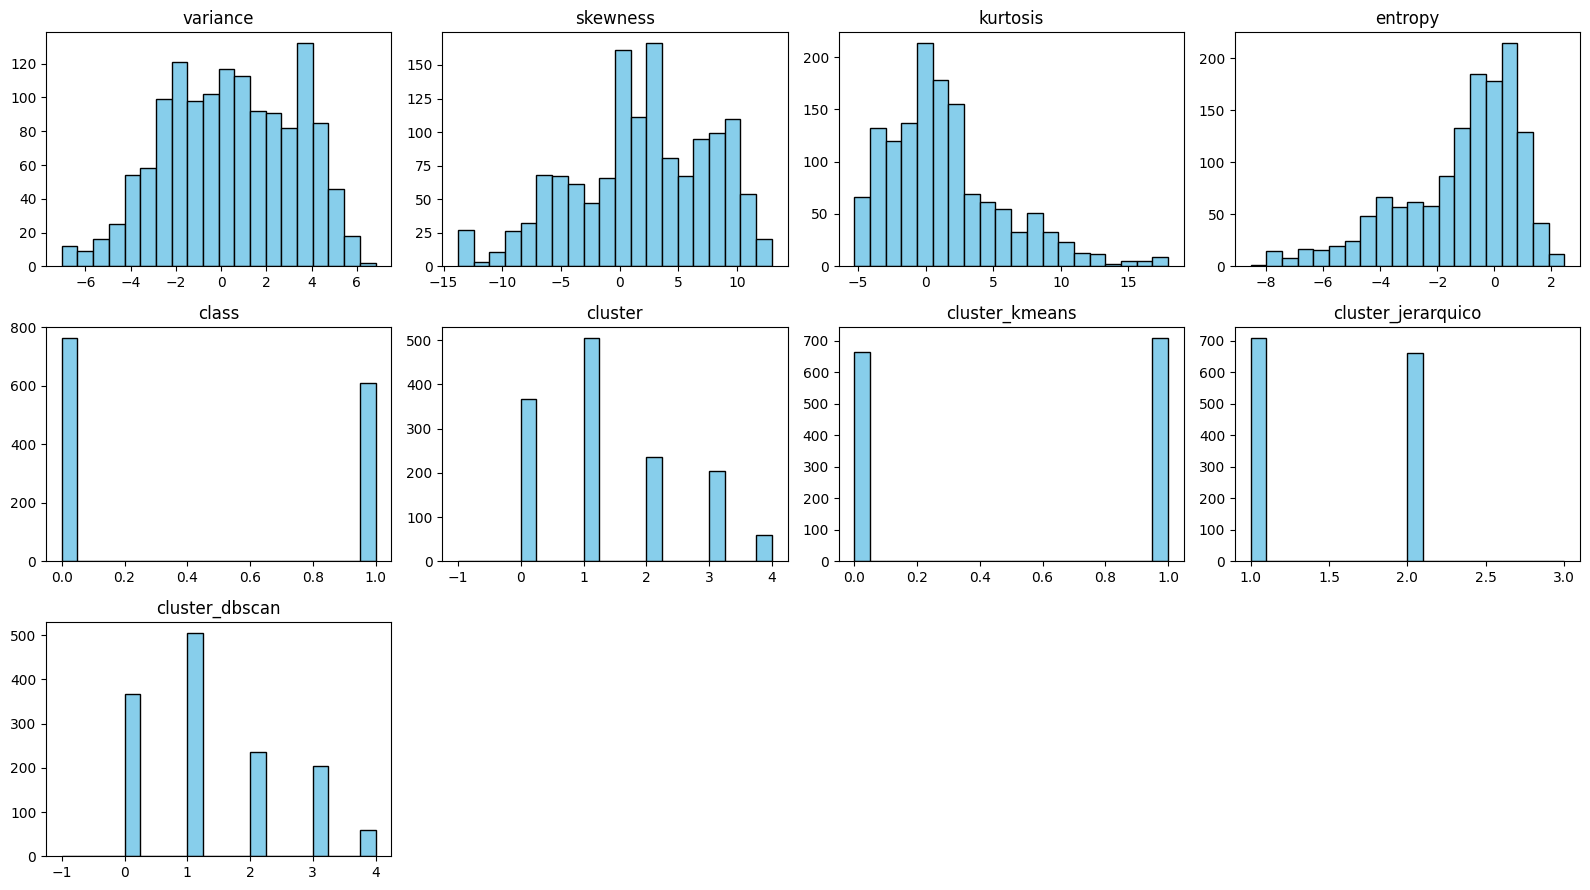

In [92]:
import matplotlib.pyplot as plt

# Número de columnas por fila
cols = 4
num_features = df_billetes.shape[1]
rows = -(-num_features // cols)  # Cálculo para redondear hacia arriba (ceil)

# Tamaño general del gráfico
plt.figure(figsize=(cols * 4, rows * 3))

# Iteramos sobre todas las columnas del DataFrame
for i, column in enumerate(df_billetes.columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df_billetes[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()


#**PCA(BANK)**

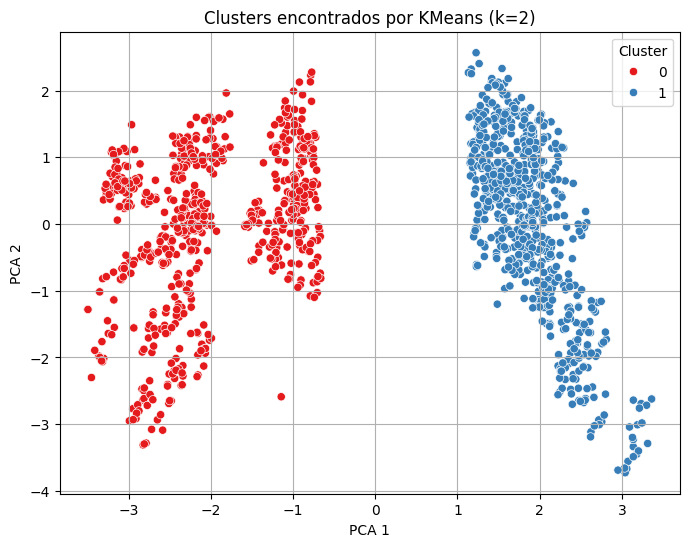

In [78]:
from sklearn.decomposition import PCA

# Escalar los datos si no se ha hecho antes
from sklearn.preprocessing import StandardScaler
X = df_billetes.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans con k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Agregar etiquetas al dataframe
df_billetes['cluster'] = labels

# Reducción a 2D con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clusters resultantes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
plt.title('Clusters encontrados por KMeans (k=2)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# **DBSCAN (BANK)**

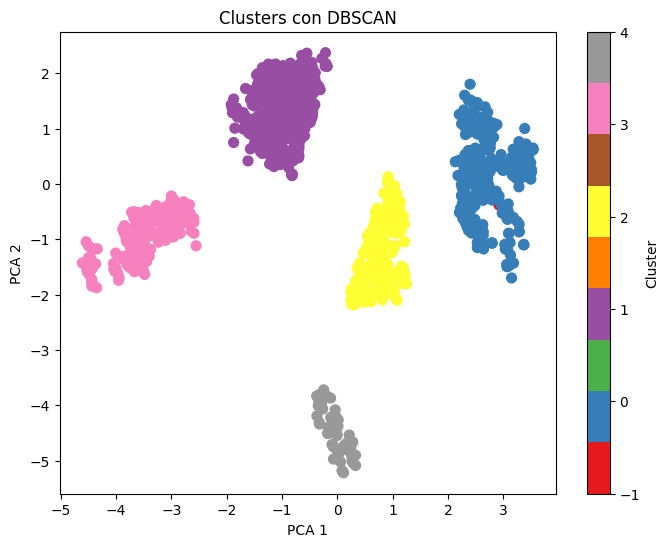

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Paso 1: Escalamos los datos (DBSCAN es sensible a la escala)
X = df_billetes.drop('class', axis=1)  # Excluye la columna 'class' si estás haciendo clustering no supervisado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Puedes ajustar estos valores
dbscan.fit(X_scaled)


# Paso 3: Revisamos los clusters asignados
df_billetes['cluster'] = dbscan.labels_

# Paso 4 (opcional): Visualizamos los clusters en 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_billetes['cluster'], cmap='Set1', s=50)
plt.title('Clusters con DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

- El modelo DBSCAN ha identificado 5 clusters válidos (etiquetados del 0 al 4) y una categoría de ruido (-1), correspondiente a puntos que no pertenecen a ningún cluster.
- Visualmente, los clusters aparecen como agrupaciones densas y bien separadas, lo que indica una buena segmentación basada en densidad. Se observan posibles patrones como la cercanía entre los clusters 1 y 3, que podrían compartir características, mientras que el cluster 4 está claramente aislado, lo que sugiere un grupo con propiedades distintas.
- El cluster 2 parece actuar como puente entre otros grupos, lo que podría reflejar una naturaleza intermedia en sus datos.
- Además, los outliers (ruido) no se distribuyen al azar, sino que tienden a ubicarse cerca de ciertos clusters como el 0, lo que puede señalar la presencia de casos límite o transiciones suaves entre grupos.

In [80]:
# Asignar etiquetas de cluster al DataFrame original
df_billetes['cluster_kmeans'] = kmeans.labels_

# Mostrar las primeras filas para verificar
df_billetes.head()


,variance,skewness,kurtosis,entropy,class,cluster,cluster_kmeans,cluster_jerarquico,cluster_dbscan
0,3.62160,8.6661,-2.8073,-0.44699,0,0,0,1,0
1,4.54590,8.1674,-2.4586,-1.46210,0,0,0,1,0
2,3.86600,-2.6383,1.9242,0.10645,0,1,1,3,0
3,3.45660,9.5228,-4.0112,-3.59440,0,0,0,1,0
4,0.32924,-4.4552,4.5718,-0.98880,0,1,1,3,0


In [81]:
# Tabla cruzada entre clase real y cluster asignado
tabla_clusters = pd.crosstab(df_billetes['class'], df_billetes['cluster'],
                             rownames=['Clase real'], colnames=['Cluster asignado'])

print(tabla_clusters)

Cluster asignado    0    1
Clase real                
0                 410  352
1                 254  356


- El Cluster 0 contiene una mezcla significativa de instancias de la Clase real 0 (410) y la Clase real 1 (254). No es un clúster "puro" para una sola clase.
-El Cluster 1 también contiene una mezcla, aunque tiene más instancias de la Clase real 1 (356) que de la Clase real 0 (352).
-Esto sugiere que el algoritmo de clustering no ha logrado separar limpiamente las dos clases reales en clústeres distintos. Los clústeres generados tienen un grado de mezcla entre las instancias de las clases originales

In [82]:
df_billetes.head(30)


,variance,skewness,kurtosis,entropy,class,cluster,cluster_kmeans,cluster_jerarquico,cluster_dbscan
0,3.62160,8.6661,-2.80730,-0.44699,0,0,0,1,0
1,4.54590,8.1674,-2.45860,-1.46210,0,0,0,1,0
2,3.86600,-2.6383,1.92420,0.10645,0,1,1,3,0
3,3.45660,9.5228,-4.01120,-3.59440,0,0,0,1,0
4,0.32924,-4.4552,4.57180,-0.98880,0,1,1,3,0
5,4.36840,9.6718,-3.96060,-3.16250,0,0,0,1,0
6,3.59120,3.0129,0.72888,0.56421,0,1,1,3,0
7,2.09220,-6.8100,8.46360,-0.60216,0,1,1,3,0
8,3.20320,5.7588,-0.75345,-0.61251,0,0,0,3,0
9,1.53560,9.1772,-2.27180,-0.73535,0,0,0,1,0


In [83]:
# Calcular el linkage para el dendrograma
# Puedes cambiar el método a: 'single', 'complete', 'average', 'ward'
linked = linkage(X_scaled, method='ward')

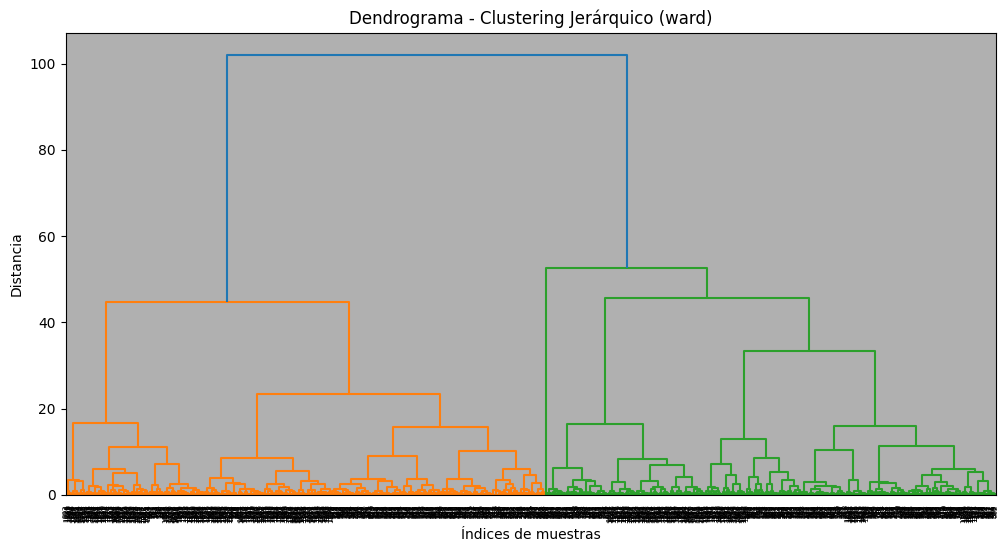

In [84]:
# Crear el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico (ward)')
plt.xlabel('Índices de muestras')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()


- El dendrograma muestra una clara agrupación de billetes en dos grandes categorías principales a una distancia de aproximadamente 55 en el eje Y, con sub-clusters más pequeños dentro de cada una, lo que sugiere diferencias significativas en las características de los billetes.
- Aunque el dendrograma por sí solo no puede distinguir directamente entre billetes verdaderos (Clase 1) y falsos (Clase 0), si se asocian las clases a estas agrupaciones, se podría inferir que el grupo de la izquierda (azul/naranja) y el de la derecha (verde) representan respectivamente billetes verdaderos y falsos (o viceversa), y que la heterogeneidad dentro de estos grupos (especialmente en el grupo "falso") podría indicar diferentes métodos o calidades de falsificación.


In [85]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma en 3 clusters (puedes cambiar el número)
clusters_hier = fcluster(linked, t=3, criterion='maxclust')

# Agregar al DataFrame
df_billetes['cluster_jerarquico'] = clusters_hier
df_billetes.head()

,variance,skewness,kurtosis,entropy,class,cluster,cluster_kmeans,cluster_jerarquico,cluster_dbscan
0,3.62160,8.6661,-2.8073,-0.44699,0,0,0,2,0
1,4.54590,8.1674,-2.4586,-1.46210,0,0,0,2,0
2,3.86600,-2.6383,1.9242,0.10645,0,1,1,1,0
3,3.45660,9.5228,-4.0112,-3.59440,0,0,0,2,0
4,0.32924,-4.4552,4.5718,-0.98880,0,1,1,1,0


# ***Calculo silhouette_score(bank)***

In [86]:
from sklearn.metrics import silhouette_score

# Asumiendo que ya tienes X_scaled y labels de KMeans (k=3)
# labels = kmeans.labels_

score = silhouette_score(X_scaled, labels)


In [87]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Calcular linkage jerárquico
linked = linkage(X_scaled, method='ward')

# 3. Cortar en clusters (ej. 3 clusters)
clusters_hier = fcluster(linked, t=3, criterion='maxclust')

# 4. Guardar clusters en DataFrame
df_billetes['cluster_jerarquico'] = clusters_hier

# 5. Calcular Silhouette Score
score_hier = silhouette_score(X_scaled, clusters_hier)


In [88]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # puedes ajustar eps y min_samples
dbscan.fit(X_scaled)

# Obtener etiquetas de cluster
labels_dbscan = dbscan.labels_

# Agregar columna al DataFrame
df_billetes['cluster_dbscan'] = labels_dbscan
df_billetes.head()


,variance,skewness,kurtosis,entropy,class,cluster,cluster_kmeans,cluster_jerarquico,cluster_dbscan
0,3.62160,8.6661,-2.8073,-0.44699,0,0,0,2,0
1,4.54590,8.1674,-2.4586,-1.46210,0,0,0,2,0
2,3.86600,-2.6383,1.9242,0.10645,0,1,1,1,1
3,3.45660,9.5228,-4.0112,-3.59440,0,0,0,2,0
4,0.32924,-4.4552,4.5718,-0.98880,0,1,1,1,1


In [89]:
labels_dbscan = df_billetes['cluster_dbscan']

# Nota: DBSCAN puede asignar etiqueta -1 a ruido; silhouette_score no acepta -1,
# así que filtramos esos puntos para el cálculo

mask = labels_dbscan != -1
score_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])

In [ ]:
print(f'Silhouette Score para K-MEANS: {score:.4f}')
print(f'Silhouette Score para clustering jerárquico: {score_hier:.4f}')
print(f'Silhouette Score para DBSCAN (sin ruido): {score_dbscan:.4f}')


Silhouette Score para K-MEANS: 0.4585
Silhouette Score para clustering jerárquico: 0.4041
Silhouette Score para DBSCAN (sin ruido): 0.4587


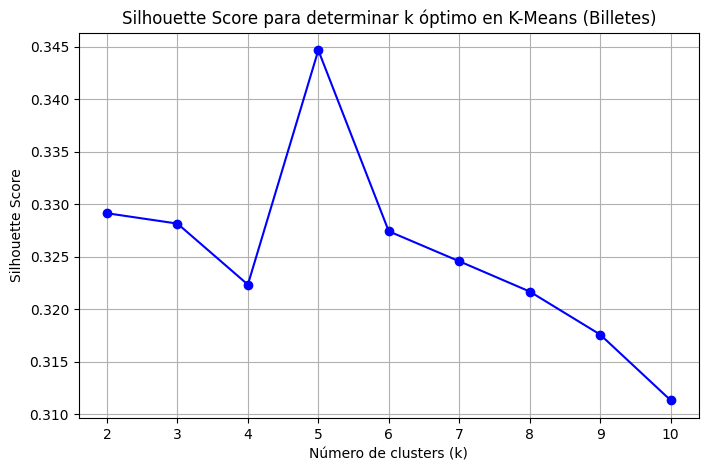

El número óptimo de clusters según el Silhouette Score para Billetes es: 5


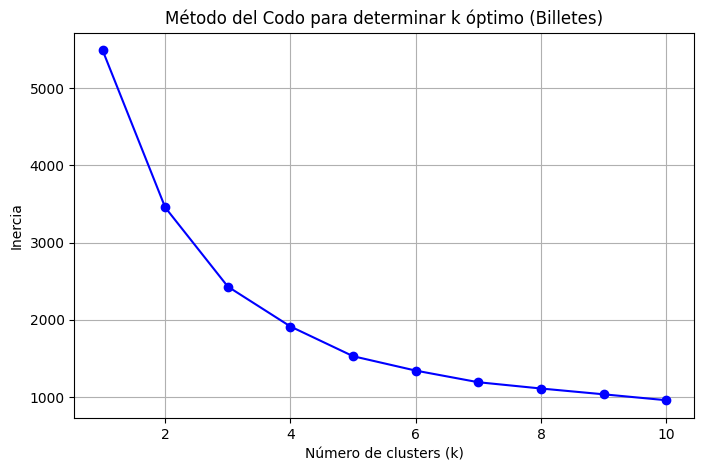

In [ ]:

import matplotlib.pyplot as plt
# Calcular Silhouette Score para diferentes valores de k
silhouette_scores = []
K = range(2, 11) # Empezamos desde 2, ya que el silhouette score no está definido para k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Añadimos n_init
    kmeans.fit(X_scaled_billetes)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled_billetes, labels)
    silhouette_scores.append(score)

# Gráfico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar k óptimo en K-Means (Billetes)')
plt.grid(True)
plt.show()

# Encontrar el k con el mejor Silhouette Score
best_k_billetes = K[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters según el Silhouette Score para Billetes es: {best_k_billetes}')

# Método del Codo para Billetes
inertia_billetes = []
K_billetes = range(1, 11)

for k in K_billetes:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_billetes)
    inertia_billetes.append(kmeans.inertia_)

# Gráfico del codo para Billetes
plt.figure(figsize=(8, 5))
plt.plot(K_billetes, inertia_billetes, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k óptimo (Billetes)')
plt.grid(True)
plt.show()